# Exercise 2

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy
%matplotlib inline

# A

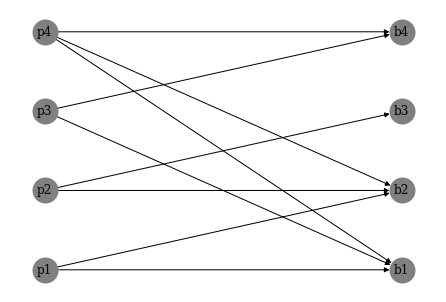

In [2]:
G = nx.DiGraph()
G.add_edges_from([('p1','b1'),('p1','b2'),
                 ('p2','b2'),('p2','b3'),
                 ('p3','b1'),('p3','b4'),
                 ('p4','b1'),('p4','b2'),('p4','b4')])

pos = {'p1':[1,1], 'p2':[1,3], 'p3':[1,5],'p4':[1,7],'b1':[2,1],'b2':[2,3],'b3':[2,5],'b4':[2,7]}
people = nx.bipartite.sets(G)[0]
books = nx.bipartite.sets(G)[1]
nx.draw(G, pos, with_labels = True, node_color='grey', node_size=600,linewidths=1.5, font_family="serif")
#plt.savefig("people_books_bipartite.eps", format='eps')

# B

In [3]:
#create an auxiliary graph starting from graph G
#an edge is added from a node "s" to each person
#an edge is added from each book to a node "t"
G_aux=nx.DiGraph()
for person in people:
    G_aux.add_edge("s", person, capacity=1)
for book in books:
    G_aux.add_edge(book, "t", capacity=1)
for edge in G.edges:
    G_aux.add_edge(edge[0],edge[1], capacity=1)

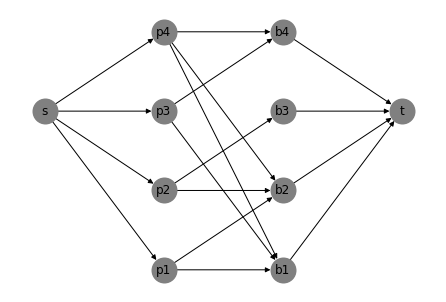

In [4]:
pos = {'s':[0,5],'p1':[1,1], 'p2':[1,3], 'p3':[1,5],'p4':[1,7],'b1':[2,1],'b2':[2,3],'b3':[2,5],'b4':[2,7], 't':[3,5]}
nx.draw(G_aux, pos, with_labels = True, node_color='grey', node_size=600,linewidths=1.5)
#plt.savefig("people_books_bipartite_with_ST.eps", format='eps')

In [5]:
max_flow=nx.algorithms.flow.maximum_flow(G_aux,'s','t')
if max_flow[0]==len(people):
    print("Perfect Matching exists, a possibility is:")
    for person in people:
        print(person, max_flow[1][person])
else:
    print("Perfect Matching does not exists")

Perfect Matching exists, a possibility is:
p2 {'b2': 0, 'b3': 1}
p3 {'b1': 0, 'b4': 1}
p1 {'b1': 0, 'b2': 1}
p4 {'b1': 1, 'b2': 0, 'b4': 0}


# C

In [6]:
G_aux_C=copy.deepcopy(G_aux)
inventory={"b1":2, "b2":3, "b3":2, "b4":2}
#numero di libri a cui è interessato

#given that a person can take at most one copy for each book he is interested in, "max_copies_person" has the value of each person node
max_copies_person={}
for person in people:
    max_copies_person[person]=G.out_degree(person)
    
for book in inventory.items():
    G_aux_C[book[0]]["t"]["capacity"]=book[1]
for person in people:
    G_aux_C["s"][person]["capacity"]=max_copies_person[person]

In [7]:
max_flow=nx.algorithms.flow.maximum_flow(G_aux_C,'s','t')
print("In total can be assigned", max_flow[0], "copies, a possibility is:")
for person in people:
    print(person, max_flow[1][person])

In total can be assigned 8 copies, a possibility is:
p2 {'b2': 1, 'b3': 1}
p3 {'b1': 0, 'b4': 1}
p1 {'b1': 1, 'b2': 1}
p4 {'b1': 1, 'b2': 1, 'b4': 1}


# D

In [8]:
G_aux_D=copy.deepcopy(G_aux_C)
#the variable state carries the need (negative value) and surplus (positive value) for each book
#the state value is obtained for each book as a difference between the capacity of the link "book->t" and the number of interested people (in_degree of the book node)
state={}
for book in books:
    state[book]=G_aux_D[book]['t']["capacity"]-G_aux_D.in_degree(book)
print("At the beginning, the state of needs is\n", state)
#inventory_BuyAndSell is an array that carries the inventory state during processing, showing at the end the optimal inventory after buying and selling books
inventory_BuyAndSell=inventory.copy()
copy_found=1
while copy_found:
    copy_found=0
    for book_neg in state.items():
        if book_neg[1]<0:
            for book_pos in state.items():
                if book_pos[1]>0:
                    diff=book_pos[1]+book_neg[1]
                    if diff>0:
                        inventory_BuyAndSell[book_neg[0]]-=book_neg[1]
                        inventory_BuyAndSell[book_pos[0]]+=book_neg[1]
                        state[book_pos[0]]=diff
                        state[book_neg[0]]=0
                    else:
                        inventory_BuyAndSell[book_neg[0]]+=book_pos[1]
                        inventory_BuyAndSell[book_pos[0]]-=book_pos[1]
                        state[book_pos[0]]=0
                        state[book_neg[0]]=diff
                    copy_found=1
                    break
                else:
                    copy_found=0
print("The old inventory was\n", inventory)
print("At the end, the new inventory is\n", inventory_BuyAndSell )

At the beginning, the state of needs is
 {'b3': 1, 'b4': 0, 'b2': 0, 'b1': -1}
The old inventory was
 {'b1': 2, 'b2': 3, 'b3': 2, 'b4': 2}
At the end, the new inventory is
 {'b1': 3, 'b2': 3, 'b3': 1, 'b4': 2}


In [9]:
for book in inventory_BuyAndSell.items():
    G_aux_D[book[0]]["t"]["capacity"]=book[1]

max_flow=nx.algorithms.flow.maximum_flow(G_aux_D,'s','t')
print("In total, after buying and selling, can be assigned", max_flow[0], "copies, a possibility is:")
for person in people:
    print(person, max_flow[1][person])

In total, after buying and selling, can be assigned 9 copies, a possibility is:
p2 {'b2': 1, 'b3': 1}
p3 {'b1': 1, 'b4': 1}
p1 {'b1': 1, 'b2': 1}
p4 {'b1': 1, 'b2': 1, 'b4': 1}
